In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("m1b.csv")

In [4]:
df = df[["date", "m1b", "m2", "price", "m1b-m2"]]

In [5]:
newdate = pd.to_datetime(df["date"])

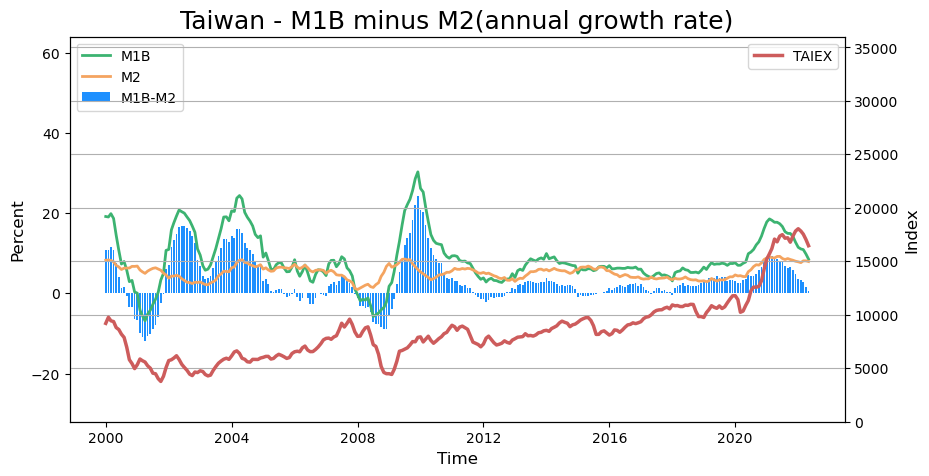

In [6]:
plt.style.use('default')
import matplotlib.dates as mdates    #處理日期
fig = plt.figure(figsize = (10,5))

ax = fig.add_subplot()
ax.plot(newdate, df["m1b"], color='mediumseagreen',linewidth = 2)
ax.plot(newdate, df["m2"], color='sandybrown',linewidth = 2)
ax.bar(newdate, df["m1b-m2"], color='dodgerblue', width = 20)

ax2 = ax.twinx()
ax2.plot(newdate, df["price"], color = "indianred",linewidth = 2.5, label='price')

         
ax.set_xlabel("Time", fontsize="12")
ax.set_ylabel("Percent", fontsize="12")
ax2.set_ylabel("Index", fontsize="12")

ax.set_ylim(-32, 64)
ax2.set_ylim(-0, 36000)

plt.title("Taiwan - M1B minus M2(annual growth rate)", fontsize="18") #台灣-M1B減M2(年增率)

ax.legend(["M1B", "M2", "M1B-M2"], loc = "upper left")
ax2.legend(["TAIEX"], loc = "upper right")
plt.grid(axis = "y")

# fig.savefig("M1B-M2.png", dpi = 500)

## M1B-M2&TAIEX相關性分析

In [20]:
a = df["m1b-m2"]
b = df["price"]

def mean(x):
    return sum(x)/len(x)

mean(a)

3.3012267657992567

In [8]:
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    return dot(v, v)

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

import math as m

def st_dev(x):
    return m.sqrt(variance(x))

print(variance(a), variance(b))

36.189248116295865 8872959.336383982


In [9]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = st_dev(x)
    stdev_y = st_dev(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0

print(covariance(a, b), correlation(a, b))

1372.957329663485 0.0766183886724925


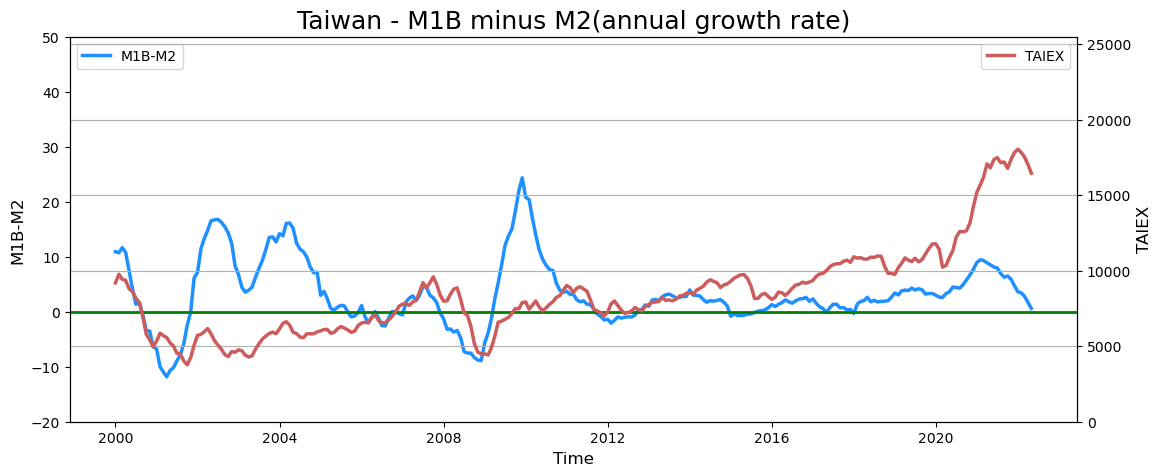

In [36]:
plt.style.use('default')
import matplotlib.dates as mdates    #處理日期
fig = plt.figure(figsize = (13,5))

ax = fig.add_subplot()
# ax.plot(newdate, df["m1b"], color='mediumseagreen',linewidth = 2)
# ax.plot(newdate, df["m2"], color='sandybrown',linewidth = 2)
ax.plot(newdate, df["m1b-m2"], color='dodgerblue', linewidth = 2.5)

ax2 = ax.twinx()
ax2.plot(newdate, df["price"], color = "indianred",linewidth = 2.5, label='price')

         
ax.set_xlabel("Time", fontsize="12")
ax.set_ylabel("M1B-M2", fontsize="12")
ax2.set_ylabel("TAIEX", fontsize="12")

# ax2.set_yscale("log")

ax.set_ylim(-20, 50)
ax2.set_ylim(0, 25500)

plt.title("Taiwan - M1B minus M2(annual growth rate)", fontsize="18") #台灣-M1B減M2(年增率)

ax.legend(["M1B-M2"], loc = "upper left")
ax2.legend(["TAIEX"], loc = "upper right")
plt.grid(axis = "y")

ax.axhline(y = 0, c = "g", lw = 2)
# ax2.axhline(y = 8479, c = "r", ls = "--", lw = 2)


# fig.savefig("M1B-M2_Taiex.png", dpi = 500)

In [37]:
df

,date,m1b,m2,price,m1b-m2
0,2000/1/1,19.17,8.26,9196.5050,10.91
1,2000/2/1,19.05,8.33,9766.7500,10.72
2,2000/3/1,19.88,8.23,9437.2275,11.65
3,2000/4/1,18.68,7.89,9364.3775,10.79
4,2000/5/1,14.52,7.00,8806.4525,7.52
...,...,...,...,...,...
264,2022/1/1,11.49,7.87,18046.8175,3.62
265,2022/2/1,11.08,7.67,17823.9750,3.41
266,2022/3/1,10.92,8.11,17535.4450,2.81
267,2022/4/1,9.81,8.12,17031.7775,1.69


In [38]:
df2 = pd.read_csv("-3.csv")

,date,m1b,m2,TAIEX( jan = Apr),m1b-m2
0,2000/1/1,19.17,8.26,9364.3775,10.91
1,2000/2/1,19.05,8.33,8806.4525,10.72
2,2000/3/1,19.88,8.23,8615.2550,11.65
3,2000/4/1,18.68,7.89,8185.6300,10.79
4,2000/5/1,14.52,7.00,7883.7600,7.52
...,...,...,...,...,...
261,2021/10/1,14.94,8.45,18046.8175,6.49
262,2021/11/1,14.18,8.26,17823.9750,5.92
263,2021/12/1,12.75,8.02,17535.4450,4.73
264,2022/1/1,11.49,7.87,17031.7775,3.62


In [42]:
newdate2 = pd.to_datetime(df2["date"])

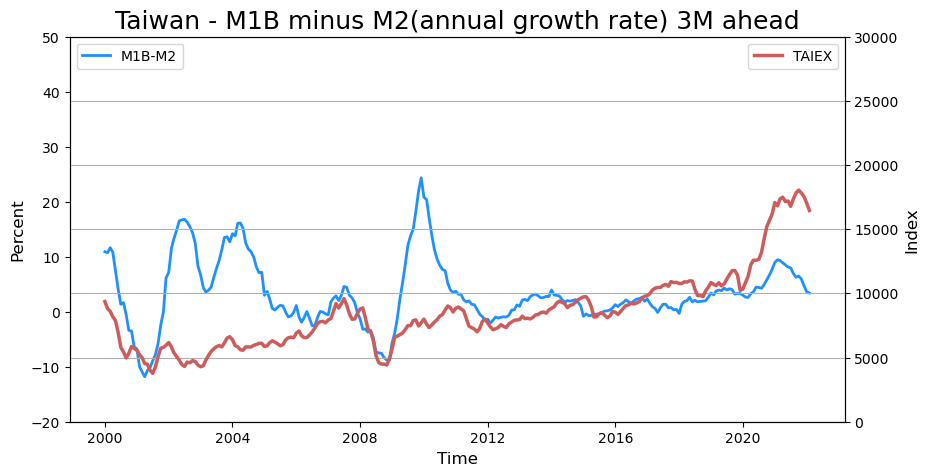

In [51]:
plt.style.use('default')
import matplotlib.dates as mdates    #處理日期
fig = plt.figure(figsize = (10,5))

ax = fig.add_subplot()
# ax.plot(newdate2, df2["m1b"], color='mediumseagreen',linewidth = 2)
# ax.plot(newdate2, df2["m2"], color='sandybrown',linewidth = 2)
ax.plot(newdate2, df2["m1b-m2"], color='dodgerblue', linewidth = 2)

ax2 = ax.twinx()
ax2.plot(newdate2, df2["TAIEX( jan = Apr)"], color = "indianred",linewidth = 2.5, label='price')

         
ax.set_xlabel("Time", fontsize="12")
ax.set_ylabel("Percent", fontsize="12")
ax2.set_ylabel("Index", fontsize="12")

ax.set_ylim(-20, 50)
ax2.set_ylim(0, 30000)

plt.title("Taiwan - M1B minus M2(annual growth rate) 3M ahead", fontsize="18") #台灣-M1B減M2(年增率)

ax.legend(["M1B-M2"], loc = "upper left")
ax2.legend(["TAIEX"], loc = "upper right")
plt.grid(axis = "y")

fig.savefig("M1B-M2_Taiex_3M_ahead.png", dpi = 500)

In [52]:
x = df2["m1b-m2"]
y = df2["TAIEX( jan = Apr)"]

print(covariance(x, y), correlation(x, y))

2027.2581884770887 0.11199806539925361
